In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
x,y,c = make_blobs(500, cluster_std= 0.8, centers=4, n_features=2, return_centers=True)

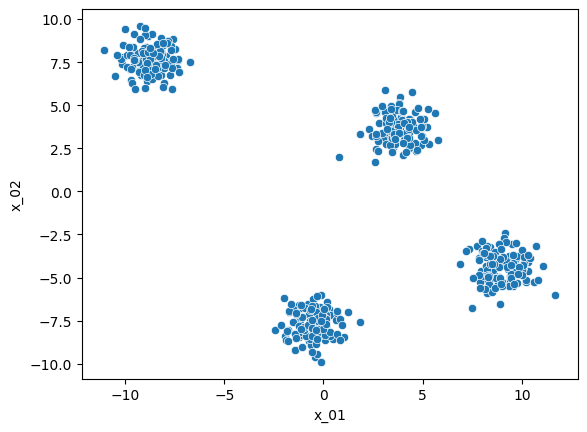

In [4]:
df_blobs = pd.DataFrame({'x_01':x[:,0], 'x_02':x[:,1], 'y':y})
sns.scatterplot(data=df_blobs, x=df_blobs['x_01'], y=df_blobs['x_02'])
plt.show()

In [9]:
x_m,y_m = make_moons(n_samples=500, noise= 0.05, random_state=42)

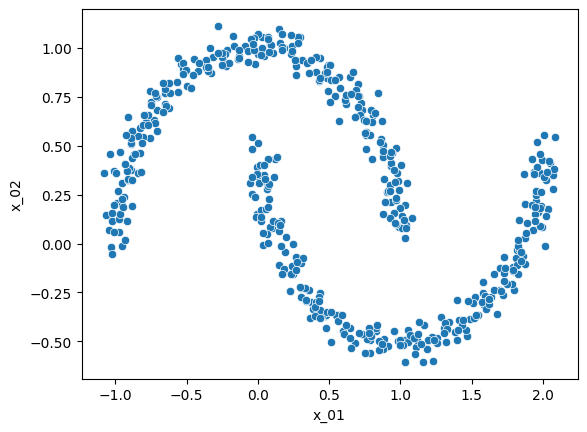

In [10]:
df_moons = pd.DataFrame({'x_01':x_m[:,0], 'x_02':x_m[:,1]})
sns.scatterplot(data=df_blobs, x=df_moons['x_01'], y=df_moons['x_02'])
plt.show()

utilizamos DBSCAN

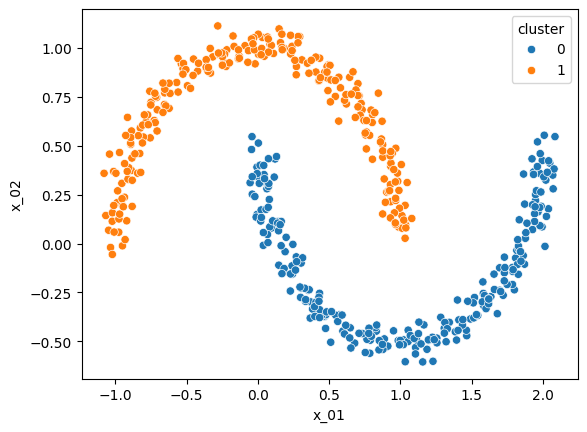

In [21]:
db_cluster = DBSCAN(eps=0.3, min_samples=3)
y_m_predict = db_cluster.fit_predict(x_m)
df_moons['cluster']= y_m_predict
sns.scatterplot(data=df_moons, x=df_moons['x_01'],y=df_moons['x_02'], hue='cluster')
plt.show()

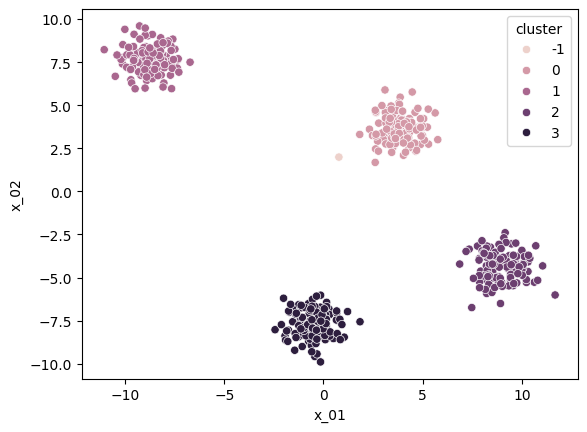

In [25]:
db_cluster_01 = DBSCAN(eps=1.5, min_samples=3)
y_pred = db_cluster_01.fit_predict(x)
df_blobs['cluster']=y_pred
sns.scatterplot(data=df_blobs, x=df_blobs['x_01'],y=df_blobs['x_02'], hue='cluster')
plt.show()

Conocer los parametros de DBSCAN

In [26]:
from sklearn.neighbors import NearestNeighbors

In [28]:
neigh = NearestNeighbors(n_neighbors=3)
neigh_fit = neigh.fit(x)
distance, indices = neigh_fit.kneighbors(x)

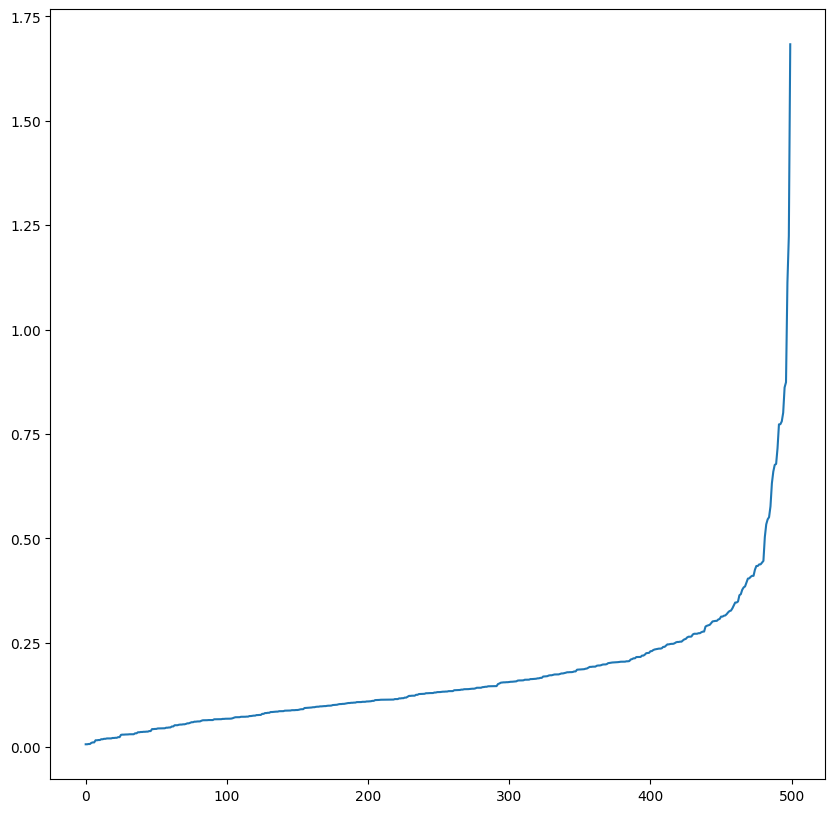

In [29]:
distance = np.sort(distance, axis=0)
distance = distance[:,1]
fit = plt.figure(figsize=(10,10))
plt.plot(distance)

In [30]:
#tomamos un rango aproximado en el que se encuentra la curva
eps_values = np.arange(0.25, 0.8, 0.10)
min_samples = np.arange(2,10)

In [31]:
from itertools import product

In [33]:
dbscan_params = list(product(eps_values, min_samples))
sil_scores = []
for p in dbscan_params :
    y_pred_01 = DBSCAN(eps= p[0], min_samples=p[1]).fit_predict(x)
    sil_scores.append(silhouette_score(x,y_pred_01))

In [35]:
df_params = pd.DataFrame.from_records(dbscan_params, columns=['eps','min_samples'])
df_params['sil_score'] = sil_scores
df_params.head()

,eps,min_samples,sil_score
0,0.25,2,-0.082889
1,0.25,3,-0.150256
2,0.25,4,-0.171896
3,0.25,5,-0.132953
4,0.25,6,-0.237890


In [40]:
df_pivot = pd.pivot_table(df_params, values='sil_score', index='min_samples', columns='eps')
df_pivot.head()

eps,0.25,0.35,0.45,0.55,0.65,0.75
min_samples,,,,,,
2,-0.082889,-0.091482,0.138867,0.813107,0.820304,0.827139
3,-0.150256,0.019087,0.582491,0.813107,0.820304,0.827139
4,-0.171896,0.012891,0.590100,0.787356,0.815476,0.827139
5,-0.132953,-0.016803,0.277205,0.773865,0.811335,0.827139
6,-0.237890,0.192978,0.644785,0.751740,0.812832,0.824513


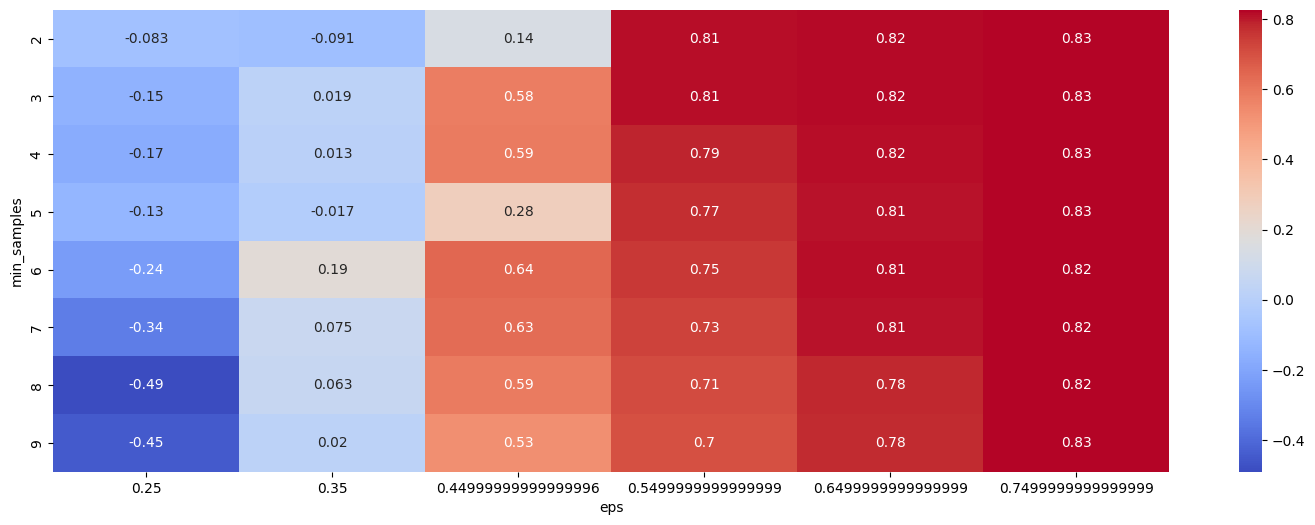

In [42]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(df_pivot, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

dbscan con los parametros obtenidos

In [44]:
db_cluster_02 = DBSCAN(eps=0.6, min_samples=3)
db_cluster_03 = DBSCAN(eps=0.8, min_samples=2)

In [46]:
y_pred_02 = db_cluster_02.fit_predict(x)
y_pred_03 = db_cluster_03.fit_predict(x)
df_blobs_02 = df_blobs.copy()
df_blobs_03 = df_blobs.copy()
df_blobs_02['cluster']=y_pred_02
df_blobs_03['cluster']=y_pred_03

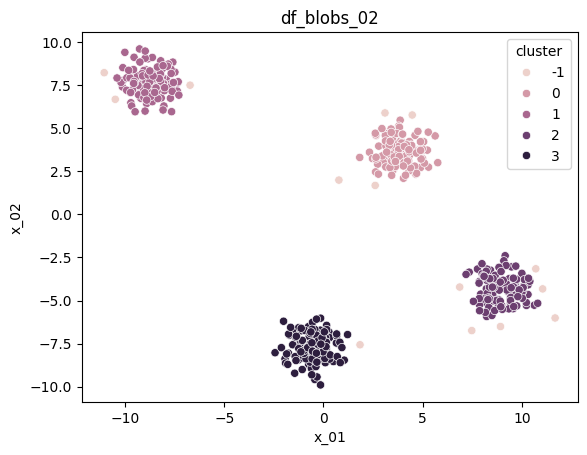

In [49]:
sns.scatterplot(data=df_blobs_02, x=df_blobs_02['x_01'],y=df_blobs_02['x_02'], hue='cluster')
plt.title('df_blobs_02')
plt.show()

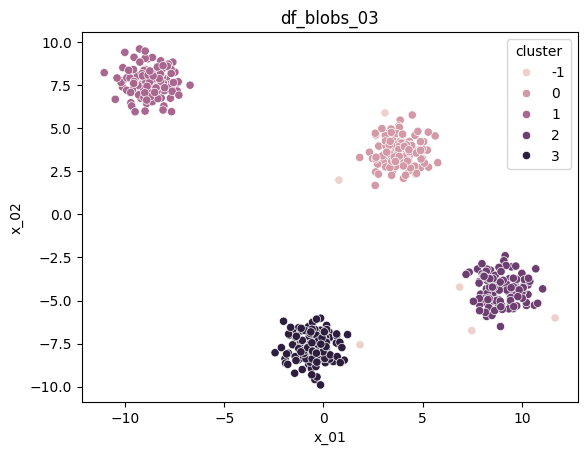

In [48]:
sns.scatterplot(data=df_blobs_03, x=df_blobs_03['x_01'],y=df_blobs_03['x_02'], hue='cluster')
plt.title('df_blobs_03')
plt.show()

For n_clusters = 5 The average silhouette_score is : 0.8214123044459609


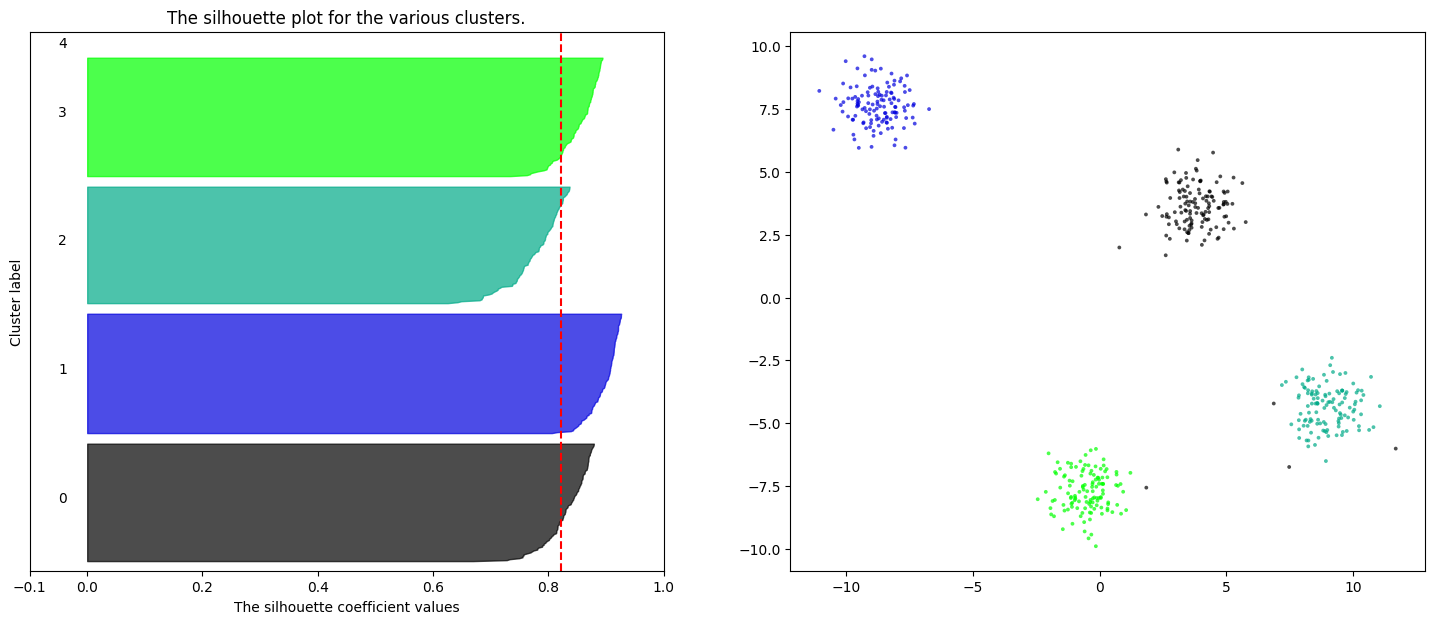

In [53]:
import matplotlib.cm as cm

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples




# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.

# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.
clusterer = db_cluster_03
cluster_labels = clusterer.fit_predict(x)
n_clusters=len(np.unique(cluster_labels))
ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])
# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(x, cluster_labels)
print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    silhouette_avg,
)
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(x, cluster_labels)
y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(
    x[:, 0], x[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)
plt.show()